In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "car_evaluation.csv"
data = pd.read_csv(file_path, header=None, names=["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"])

In [3]:
# 범주형 데이터를 숫자로 변환
data_encoded = pd.get_dummies(data, columns=["buying", "maint", "doors", "persons", "lug_boot", "safety"], drop_first=True)

In [4]:
# 입력 변수(X)와 타겟 변수(y) 분리
X = data_encoded.drop("class", axis=1)
y = data["class"].astype("category").cat.codes

In [5]:
# 데이터셋 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 모델 학습 및 평가
# 1. 의사결정트리 모델
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
dt_predictions = decision_tree.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

In [7]:
# 2. 랜덤포레스트 모델
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
rf_predictions = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

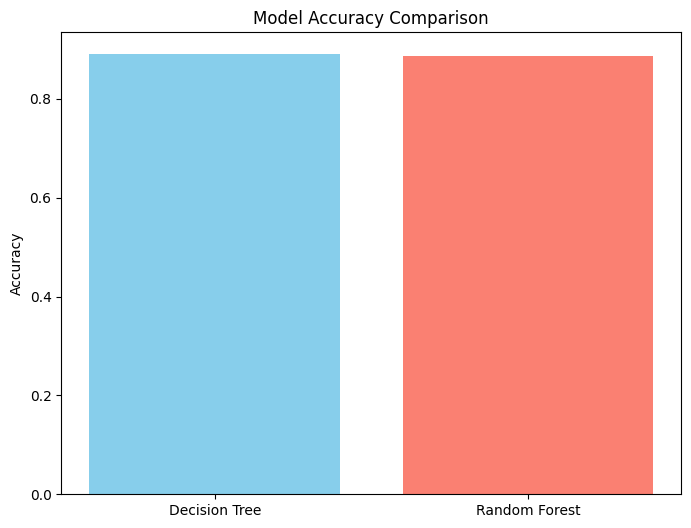

In [8]:
# 성능 비교 막대그래프
plt.figure(figsize=(8, 6))
plt.bar(["Decision Tree", "Random Forest"], [dt_accuracy, rf_accuracy], color=["skyblue", "salmon"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

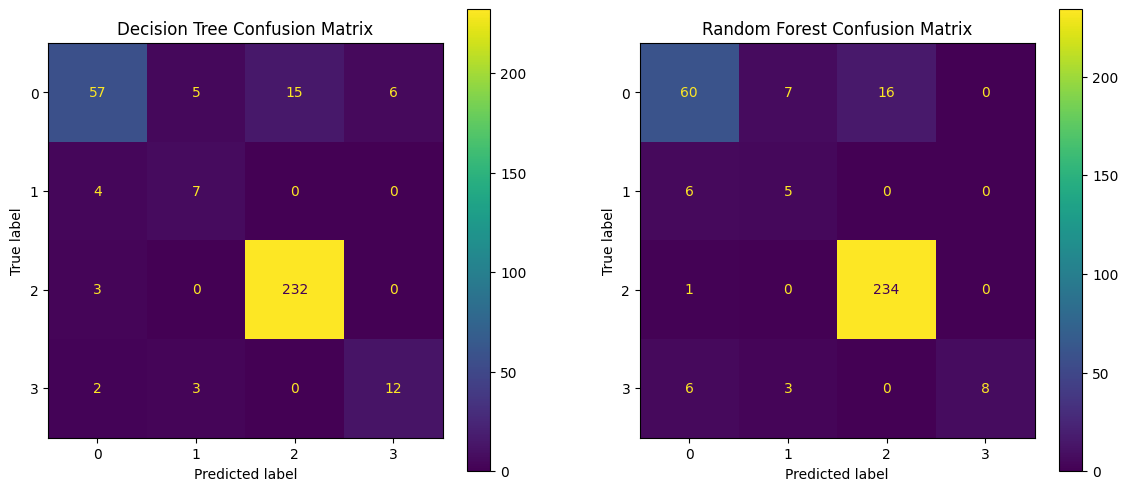

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
ConfusionMatrixDisplay(confusion_matrix(y_test, dt_predictions), display_labels=np.unique(y)).plot(ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")
ConfusionMatrixDisplay(confusion_matrix(y_test, rf_predictions), display_labels=np.unique(y)).plot(ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_41784\2365761317.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")


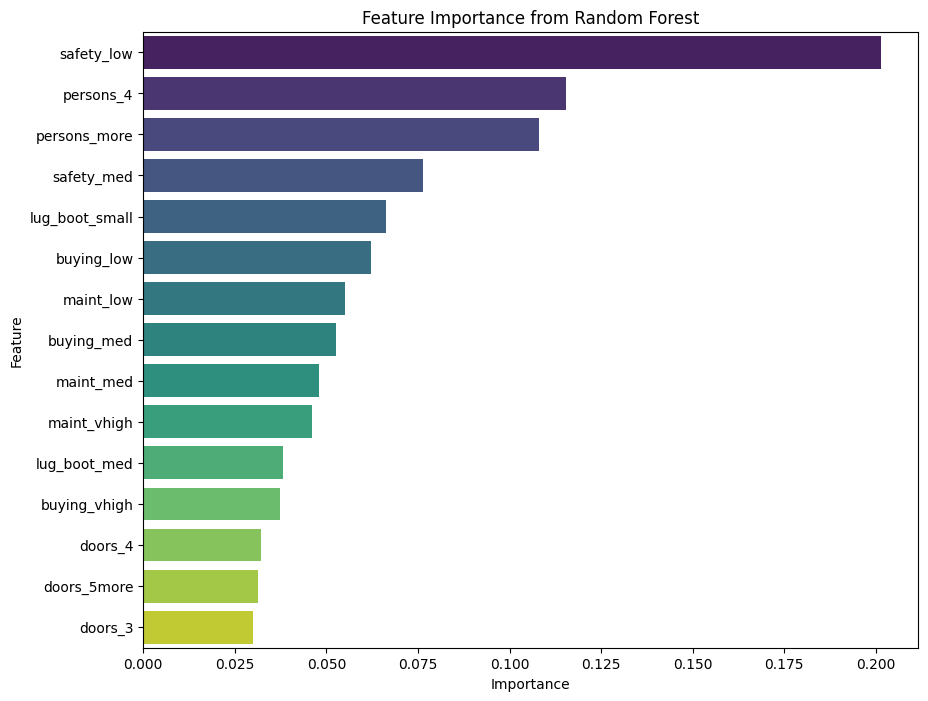

In [10]:
feature_importances = random_forest.feature_importances_
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.show()

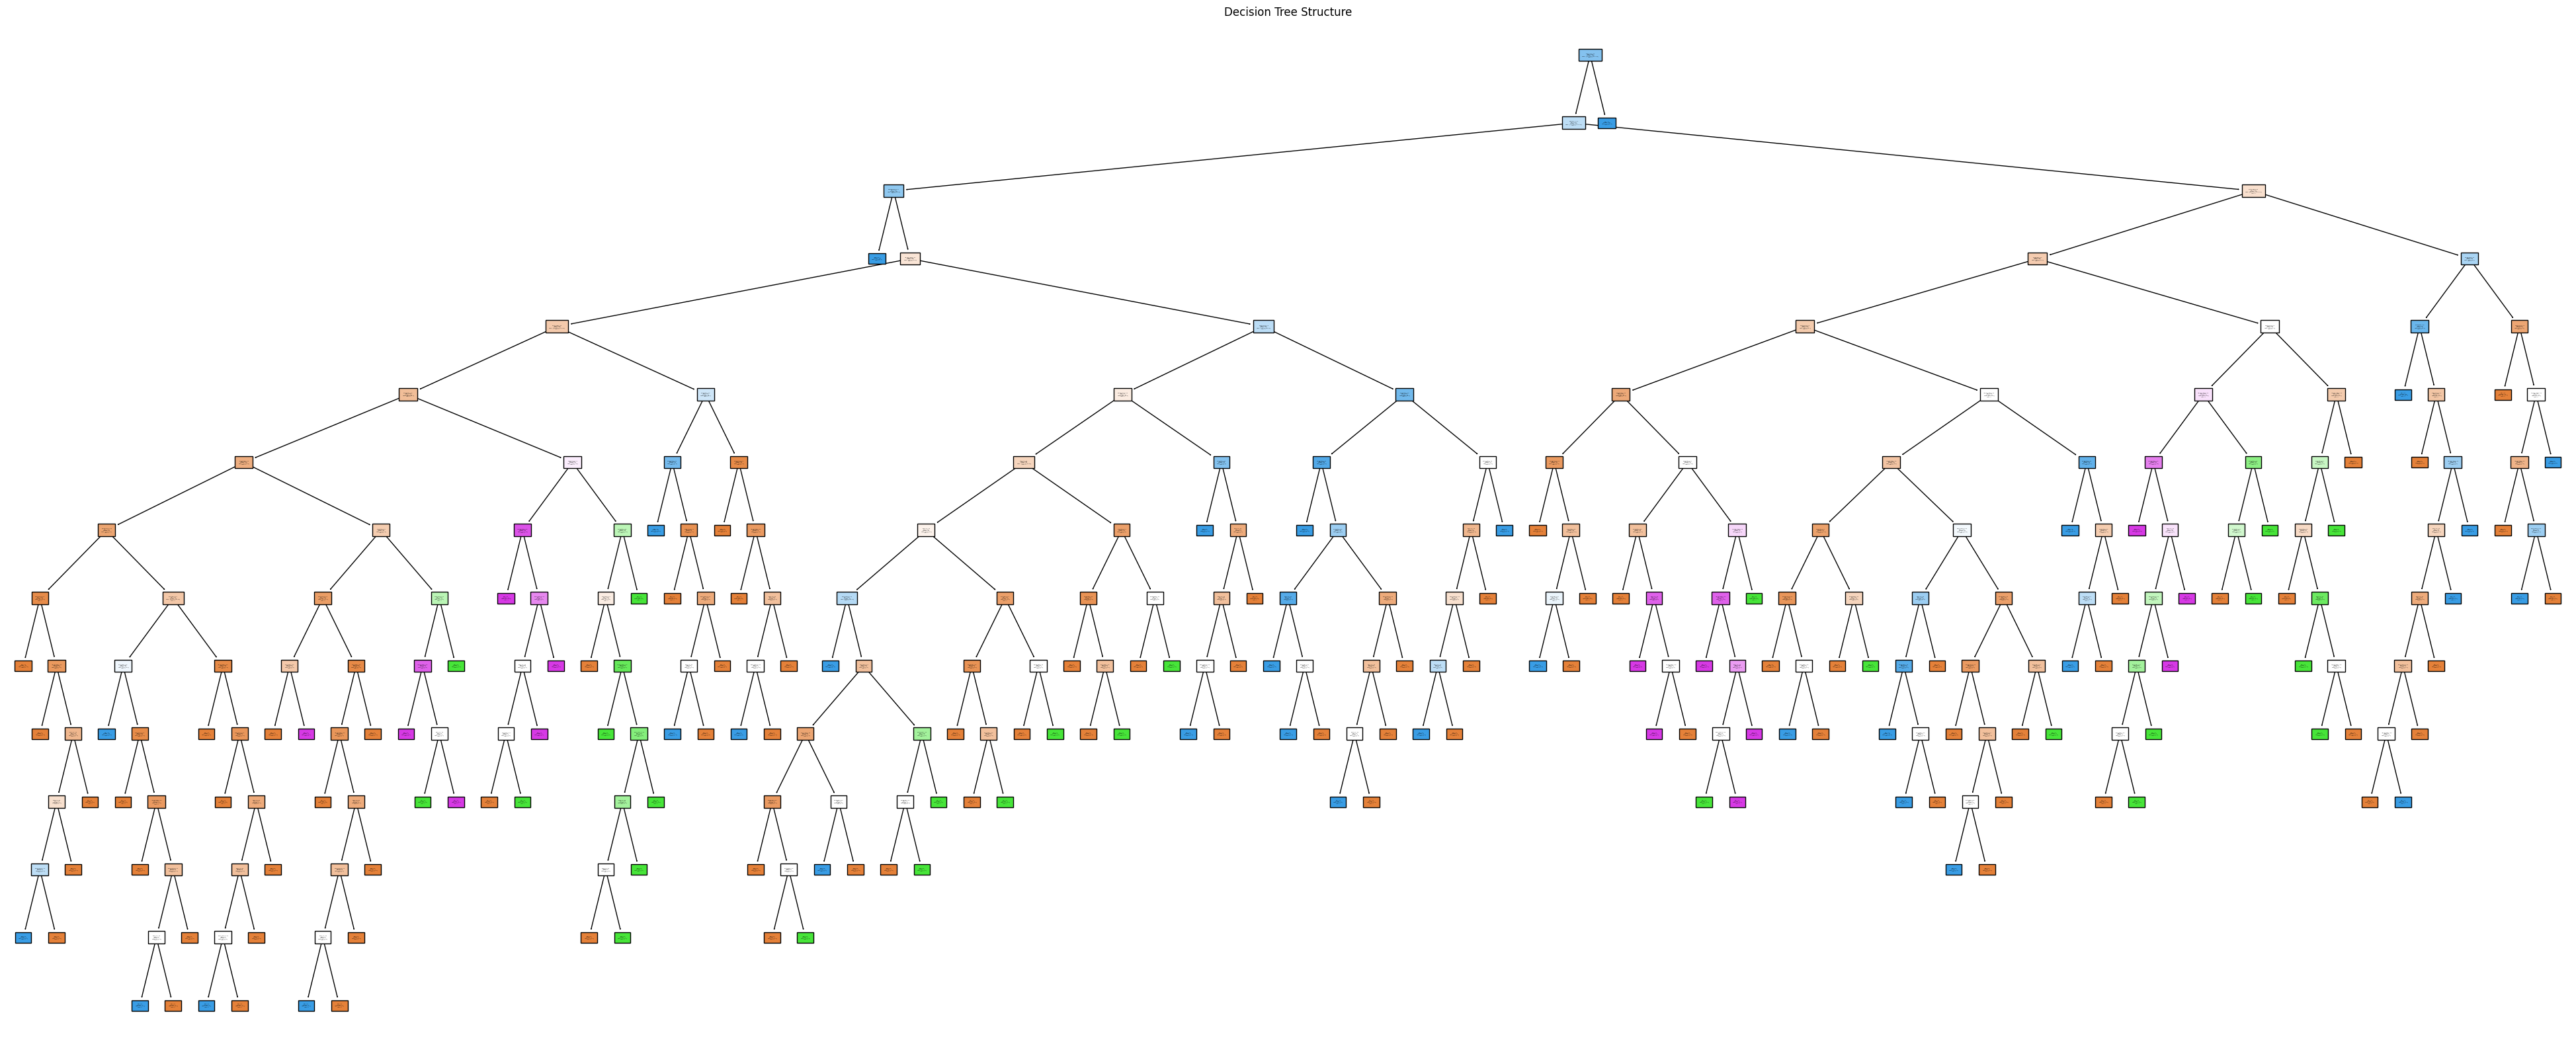

In [14]:
# 의사결정트리 시각화
plt.figure(figsize=(50, 20))
plot_tree(decision_tree, feature_names=X.columns, class_names=np.unique(y).astype(str), filled=True, fontsize=1)
plt.title("Decision Tree Structure")
plt.show()

In [12]:
# 결과 출력
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

Decision Tree Accuracy: 0.8901734104046243
Random Forest Accuracy: 0.8872832369942196
